In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[2.         2.33333333 2.66666667 3.         3.33333333 3.66666667
 4.         4.33333333 4.66666667 5.        ]


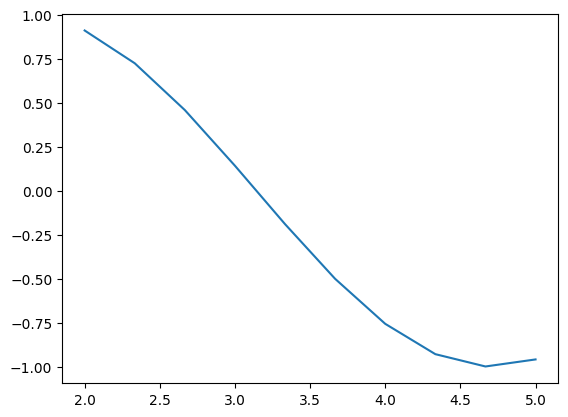

In [2]:
fig=plt.figure()
ax=plt.axes()
x=np.linspace(2,5,10)
ax.plot(x, np.sin(x));
print(x)

In [3]:
y=np.sin(x)
y

array([ 0.90929743,  0.72308588,  0.45727263,  0.14112001, -0.19056796,
       -0.50127705, -0.7568025 , -0.9290145 , -0.99895492, -0.95892427])

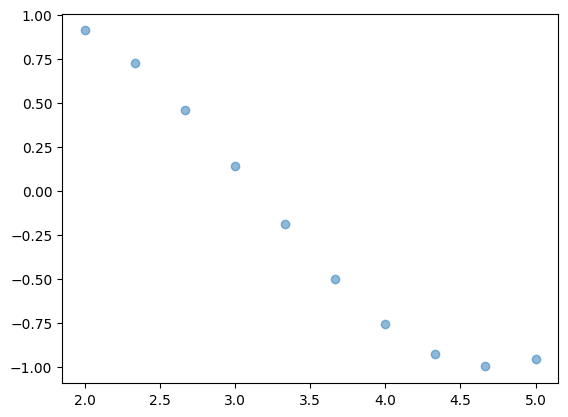

In [4]:
plt.scatter(x,y, alpha=0.5)

In [5]:
def local_regression(x0,x,y,tau):
  x0=np.r_[1,x0]
  X=np.c_[np.ones(len(x)),x]
  xw=X.T*radial_kernel(x0,X,tau)
  beta=np.linalg.pinv(xw@X)@xw@y
  return x0@beta

In [6]:
def radial_kernel(x0,X,tau):
  return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * (tau **2) ))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

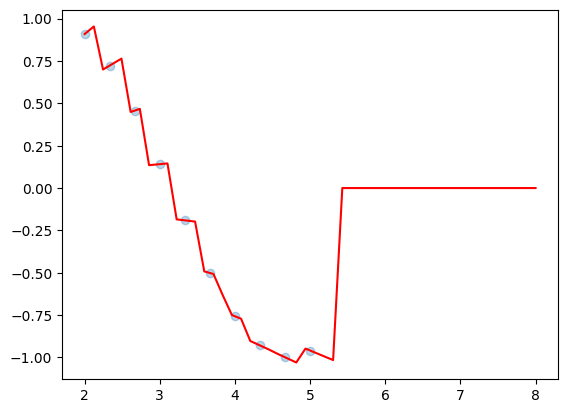

In [7]:
def plot_lwr(tau):
  domain = np.linspace(2,8,50)
  prediction = [local_regression(x0,x,y,tau) for x0 in domain]

  plt.scatter(x, y, alpha=.3)
  plt.plot(domain, prediction, color='red')

  return plt


plot_lwr(0.01)

In [8]:
def local_regression(x0,x,y,tau):
  x0=np.r_[1,x0]
  x=np.c_[np.ones(len(x)),x]
  xw=x.T *radial_kernel(x0,x,tau)
  beta=np.linalg.pinv(xw@x)@xw@y

In [9]:
def local_regression(x0, x, y, tau):
    x0 = np.ones((1, x.shape[0]))
    y = y.reshape((-1, 1))
    xw = radial_kernel(x, x0, tau)
    beta = np.linalg.pinv(x.T @ (xw * x)) @ x.T @ (xw * y)
    return x0 @ beta

In [10]:
def radial_kernel(x0, x, tau):
    distances = np.sum((x - x0)**2, axis=1)
    weights = np.exp(-distances / (2 * tau**2))
    return weights

In [12]:

def plot_lwr(tau):

    x = np.linspace(2, 3, 50)
    y = np.sin(x)
    y_predicted = local_regression(x, x, y, tau)
    plt.scatter(x, y, alpha=0.5)
    plt.plot(x, y_predicted, color="red")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    return y_predicted
